In [1]:
#Importing libraries
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D
from tensorflow.keras import Model
import PIL
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator #allows us to augment and process data fed into a CNN
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import os,cv2,random
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator #A tool that allows us to augment and process data to be fed into a CNN
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import confusion_matrix

C:\Users\USER2\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER2\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER2\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER2\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
path_inception = "D:/amitavsir/bcd/data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
local_weights_file = path_inception
pre_trained_model = VGG16(input_shape = (121,121,3),
              include_top = False,
              weights = None)
pre_trained_model.load_weights(local_weights_file)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
#Locking the weights and parameters of pretrained model
for layer in pre_trained_model.layers:
    layer.trainable = False

#Getting desired layer output
last_layer = pre_trained_model.get_layer('block5_conv2')
last = last_layer.output
print('Last layer output shape : ', last.shape)

Last layer output shape :  (?, 7, 7, 512)


In [11]:
from tensorflow.keras.losses import categorical_crossentropy
# Model configuration
batch_size = 50
img_size, img_num_channels = 121, 3
loss_function = categorical_crossentropy
no_classes = 4
no_epochs = 20
optimizer = Adam()
verbosity = 1

In [25]:
#Building own model on top of trained network
x = Conv2D(600, (1,1), activation = 'relu')(last)
x = Flatten()(x)
x = Dense(1028, activation = 'relu')(x)
x = Dropout(rate = 0.1)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(rate = 0.1)(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(rate = 0.15)(x)
x = Dense(4, activation = 'softmax')(x)

#Compiling model
classifier = Model(inputs = pre_trained_model.input, outputs = x, name = 'Predict')
opt1 = Adam(learning_rate = 0.002)
opt2 = RMSprop(learning_rate = 0.001)
classifier.compile(optimizer = opt1 , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
#FEEDING DATA INTO THE MODEL
from tensorflow.keras.preprocessing.image import ImageDataGenerator #A tool that allows us to augment and process data to be fed into a CNN

#class for training set
train_data = ImageDataGenerator(rescale = 1./255, #pixel values rescaled so that it stays between 0 and 1.
                                shear_range = 0.2, #this and the next 4 steps are used to augment our data by shearing it, flipping and zooming it to produce more examples per image.
                                zoom_range = 0.2,  #Data augmentation allows us to prevent overfitting of data into the training set.
                                horizontal_flip = True,
                                vertical_flip = True,
                                rotation_range = 40,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                fill_mode = 'nearest'
                                )

test_data = ImageDataGenerator(rescale =1./255)

In [27]:
train_set = train_data.flow_from_directory('D:/amitavsir/bcd/datacompressed/train', #Image path
                                           target_size = (121,121), #The shape which we want to input our images in our model
                                           batch_size = 20,         #The batch size in mini batch gradient descent
                                           class_mode = 'categorical')   


test_set = test_data.flow_from_directory('D:/amitavsir/bcd/datacompressed/validation',
                                         target_size = (121,121),
                                         batch_size = 50,
                                         class_mode = 'categorical')

Found 962 images belonging to 4 classes.
Found 500 images belonging to 4 classes.


In [28]:
#Fitting the images to the model
history = classifier.fit_generator(train_set,
                         steps_per_epoch = int(962/30),
                         epochs = 30,
                         validation_data = test_set,
                         validation_steps = 5)

Epoch 1/30
32/32 [==============================] - 116s 4s/step - loss: 4.2393 - acc: 0.3264 - val_loss: 1.1446 - val_acc: 0.4320
Epoch 2/30
32/32 [==============================] - 127s 4s/step - loss: 1.0119 - acc: 0.5498 - val_loss: 1.0804 - val_acc: 0.5480
Epoch 3/30
32/32 [==============================] - 132s 4s/step - loss: 0.9514 - acc: 0.5672 - val_loss: 0.9207 - val_acc: 0.6280
Epoch 4/30
32/32 [==============================] - 129s 4s/step - loss: 0.8948 - acc: 0.5875 - val_loss: 0.8874 - val_acc: 0.5800
Epoch 5/30
32/32 [==============================] - 128s 4s/step - loss: 0.7996 - acc: 0.6640 - val_loss: 0.7935 - val_acc: 0.6160
Epoch 6/30
32/32 [==============================] - 84s 3s/step - loss: 0.8251 - acc: 0.6190 - val_loss: 0.8265 - val_acc: 0.6160
Epoch 7/30
32/32 [==============================] - 92s 3s/step - loss: 0.7708 - acc: 0.6594 - val_loss: 0.7114 - val_acc: 0.6840
Epoch 8/30
32/32 [==============================] - 127s 4s/step - loss: 0.8015 - acc

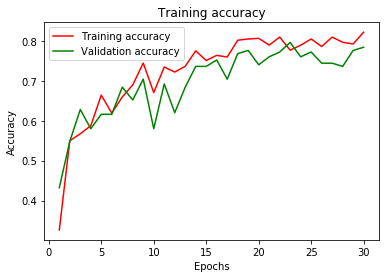

In [29]:
#plotting the accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_accuracy = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training accuracy')
plt.plot(epochs, val_accuracy, color='green', label='Validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()